In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
import copy
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:

#прочитать и сформировать MultiHeader
file = pd.ExcelFile('breast-cancer-wisconsin.xlsx')
df = pd.read_excel(file, names=['Товщина скупчення','Однорідність розміру комірок','Однорідність форми комірок','Маргінальна адгезія','Розмір поодиноких епітеліальних комірок','Оголені ядра клітин','Помірний хроматин','Нормальні ядерця','Метастази','Клас-діагноз'])
df

In [ ]:
df

In [ ]:
#удалить столбцы с >20% нулевых значений
df_clean = df.dropna(axis = 1, thresh=int(0.8*len(df)))

In [ ]:
#заполнить оставшиеся пропущенные значения средним по столбцам
df_fill_mean = df_clean.fillna(df_clean.mean())

In [ ]:
features = df_fill_mean.columns.values.tolist()[2:]

In [ ]:
x = df_fill_mean.iloc[:,2:].values
#x = x[:,1:]
x

In [ ]:
# Separating out the target
y = df_fill_mean.loc[:,'Клас-діагноз'].values
y

In [23]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents)

[[ 4.87227393 -4.59200181]
 [-3.91350632 -0.57077547]
 [ 2.89546037  2.76070794]
 ...
 [ 8.45891181  6.60180761]
 [ 5.38794034  1.86086735]
 [ 6.62824371  0.41448726]]


In [25]:
principalDf = pd.DataFrame(data = principalComponents,
                            columns = ['principal component 1', 'principal component 2'])
principalDf
finalDf2 = pd.concat([principalDf, df_fill_mean[['Клас-діагноз']].reset_index(drop=True)], axis = 1)
finalDf2

,principal component 1,principal component 2,Клас-діагноз
0,4.872274,-4.592002,2
1,-3.913506,-0.570775,2
2,2.895460,2.760708,2
3,-3.658919,0.034473,2
4,12.964034,-0.784577,4
...,...,...,...
677,-4.300232,-0.429692,2
678,-5.096880,0.093101,2
679,8.458912,6.601808,4
680,5.387940,1.860867,4


KeyError: 'principal component 1'

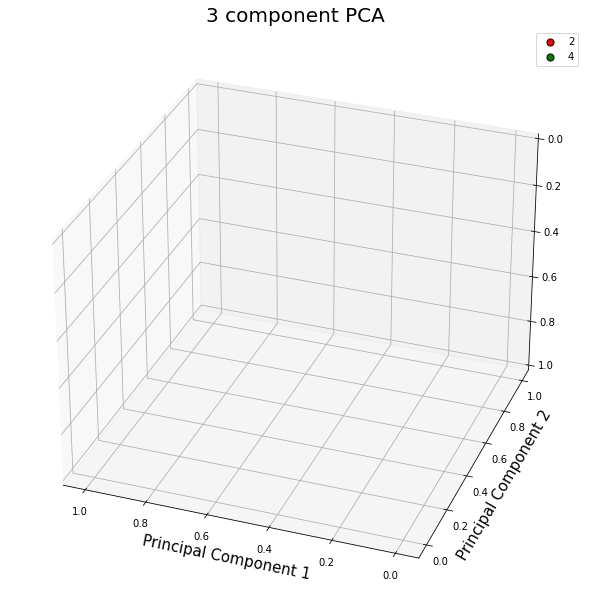

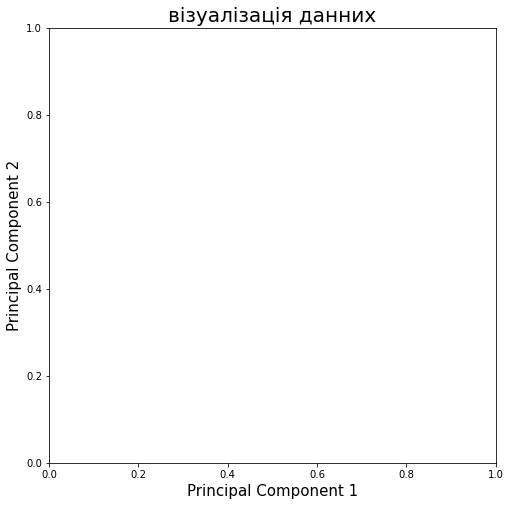

In [31]:
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-150, azim=70) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['2', '4']
colors = ['r', 'g' ]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf3['Клас-діагноз'] == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1'],
               finalDf3.loc[indicesToKeep, 'principal component 2'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.legend(targets)
ax.grid()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('візуалізація данних', fontsize = 20)
targets = ['2', '4']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Клас-діагноз'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1'],
               df.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()


In [28]:
x_stan = StandardScaler().fit_transform(x)
print(x_stan[:2,:])


[[ 0.26160925  0.75676668  1.69349395  1.77117926 -0.18196482 -0.28587284
  -0.34868607 -0.73450894]
 [-0.74261687 -0.64002594 -0.55614156 -0.42508302 -0.18196482 -0.61354557
  -0.34868607 -0.73450894]]


In [21]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_stan)
y_kmeans

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,

In [39]:
y_k = copy.copy(y)
y_k[y ==2]=1
y_k[y ==4]=0

# make predictions
expected = list(y_k)
predicted = list(y_kmeans)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       239
           1       0.98      0.99      0.98       443

    accuracy                           0.98       682
   macro avg       0.98      0.97      0.98       682
weighted avg       0.98      0.98      0.98       682

[[230   9]
 [  6 437]]


In [40]:
y_k

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,

In [41]:
y

array([2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2,